<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/WIX3001_Tutorial_3_Fuzzy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzification and Defuzzification

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=7ee86fa420410e2d0475bc7a1eb41ee15178080f3ba6cf19a21487fd68ba0565
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']],
                       columns=iris_data['feature_names'] + ['target'])

In [4]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Split the dataset into features and target
X = iris_df.drop(columns=['target'])
y = iris_df['target']

In [6]:
# Define input and output variables
sepal_length = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'sepal_length')
sepal_width = ctrl.Antecedent(np.arange(2, 5.1, 0.1), 'sepal_width')
petal_length = ctrl.Antecedent(np.arange(1, 7.1, 0.1), 'petal_length')
petal_width = ctrl.Antecedent(np.arange(0.1, 3.1, 0.1), 'petal_width')

iris_class = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'iris_class')

In [7]:
# Manually define membership functions for input variables
mf_val = np.array([
    4.0, 5.0, 6.0,
    5.0, 6.0, 7.0,
    6.0, 7.0, 8.0,

    2.0, 2.5, 3.0,
    2.5, 3.0, 3.5,
    3.0, 4.0, 5.0,

    1.0, 2.0, 3.0,
    2.0, 3.0, 4.0,
    3.0, 5.0, 7.0,

    0.1, 0.1, 1.0,
    0.1, 1.0, 2.0,
    1.0, 2.0, 3.0
])

In [8]:
sepal_length['short'] = fuzz.trimf(sepal_length.universe, [mf_val[0], mf_val[1], mf_val[2]])
sepal_length['medium'] = fuzz.trimf(sepal_length.universe, [mf_val[3], mf_val[4], mf_val[5]])
sepal_length['long'] = fuzz.trimf(sepal_length.universe, [mf_val[6], mf_val[7], mf_val[8]])

sepal_width['narrow'] = fuzz.trimf(sepal_width.universe, [mf_val[9], mf_val[10], mf_val[11]])
sepal_width['medium'] = fuzz.trimf(sepal_width.universe, [mf_val[12], mf_val[13], mf_val[14]])
sepal_width['wide'] = fuzz.trimf(sepal_width.universe, [mf_val[15], mf_val[16], mf_val[17]])

petal_length['short'] = fuzz.trimf(petal_length.universe, [mf_val[18], mf_val[19], mf_val[20]])
petal_length['medium'] = fuzz.trimf(petal_length.universe, [mf_val[21], mf_val[22], mf_val[23]])
petal_length['long'] = fuzz.trimf(petal_length.universe, [mf_val[24], mf_val[25], mf_val[26]])

petal_width['narrow'] = fuzz.trimf(petal_width.universe, [mf_val[27], mf_val[28], mf_val[29]])
petal_width['medium'] = fuzz.trimf(petal_width.universe, [mf_val[30], mf_val[31], mf_val[32]])
petal_width['wide'] = fuzz.trimf(petal_width.universe, [mf_val[33], mf_val[34], mf_val[35]])

In [9]:
# Define membership functions for output variable
iris_class['setosa'] = fuzz.trimf(iris_class.universe, [0, 0, 1])
iris_class['versicolor'] = fuzz.trimf(iris_class.universe, [0, 1, 2])
iris_class['virginica'] = fuzz.trimf(iris_class.universe, [1, 2, 3])

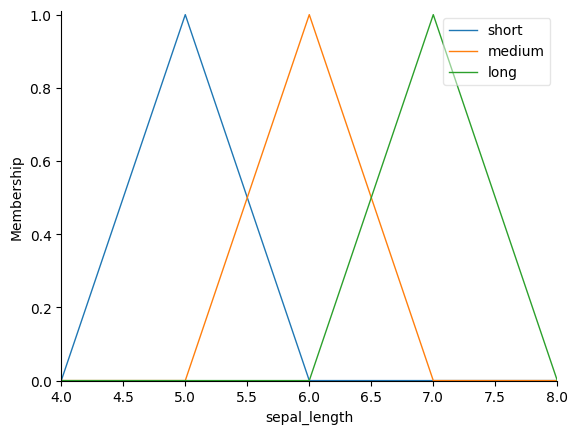

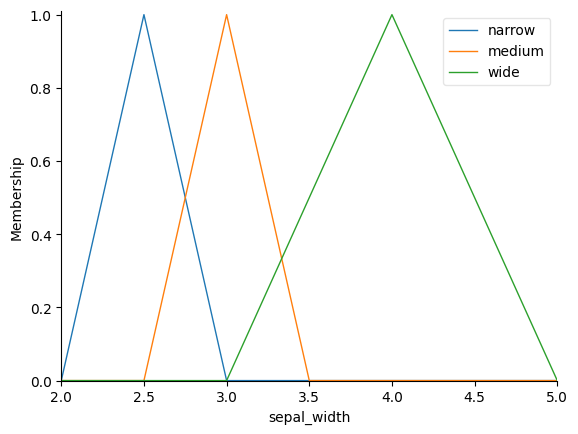

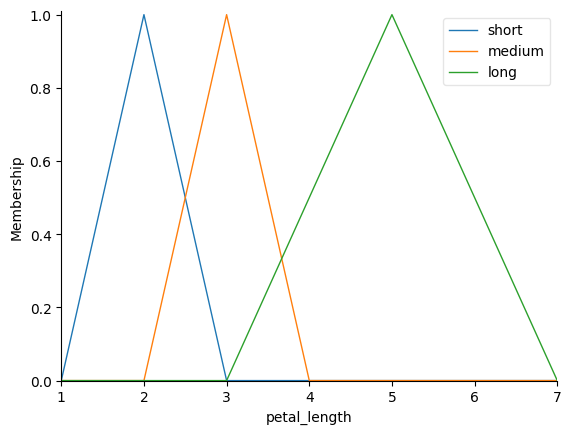

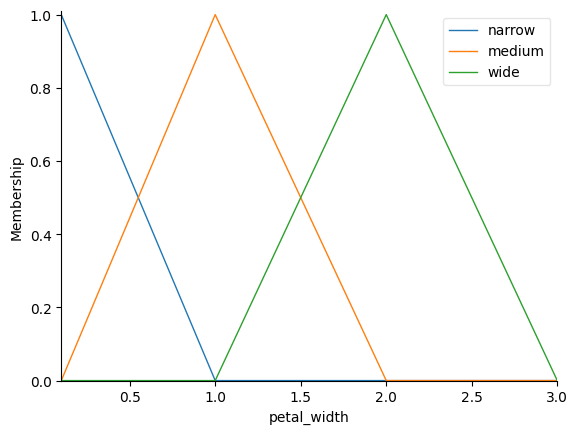

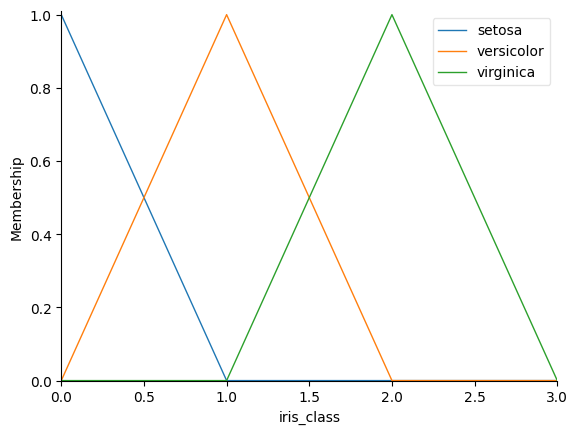

In [10]:
# Display the membership functions
sepal_length.view()
sepal_width.view()
petal_length.view()
petal_width.view()
iris_class.view()

In [11]:
# Define fuzzy rules
rule1 = ctrl.Rule(sepal_length['short'] | sepal_width['narrow'], iris_class['setosa'])
rule2 = ctrl.Rule(petal_length['medium'], iris_class['versicolor'])
rule3 = ctrl.Rule(petal_width['wide'] | petal_length['long'], iris_class['virginica'])

# Create control system
iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Define control system simulation
iris_ctrl_sim = ctrl.ControlSystemSimulation(iris_ctrl)

In [12]:
# Test with dataset
results = {
    'prediction': [],
    'actual': []
}
for i in range(len(X)):
  input_values = {'sepal_length': X['sepal length (cm)'][i],
                  'sepal_width': X['sepal width (cm)'][i],
                  'petal_length': X['petal length (cm)'][i],
                  'petal_width': X['petal width (cm)'][i]}
  output_value = y[i]

  # Compute output
  for key, value in input_values.items():
      iris_ctrl_sim.input[key] = value

  iris_ctrl_sim.compute()
  results['actual'] += [y[i]]
  results['prediction'] += [iris_ctrl_sim.output['iris_class']]

# # Print output
# print("\nOutput:")
# print("Predicted Iris class:", iris_ctrl_sim.output['iris_class'])

# # Show the output membership function
# iris_class.view(sim=iris_ctrl_sim)

In [13]:
mse = mean_squared_error(results['actual'], results['prediction'])
print(mse)

0.212021974390259


In [14]:
# Automatically generate fuzzy membership functions using automf
sepal_length.automf(3)
sepal_width.automf(3)
petal_length.automf(3)
petal_width.automf(3)
iris_class.automf(3)

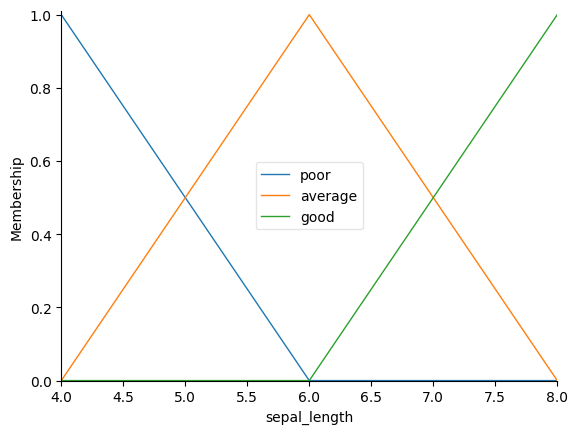

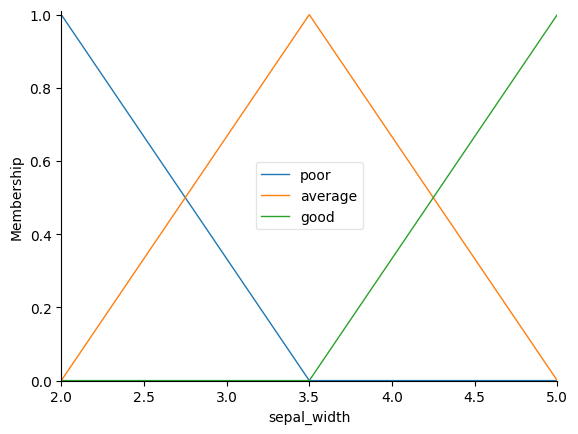

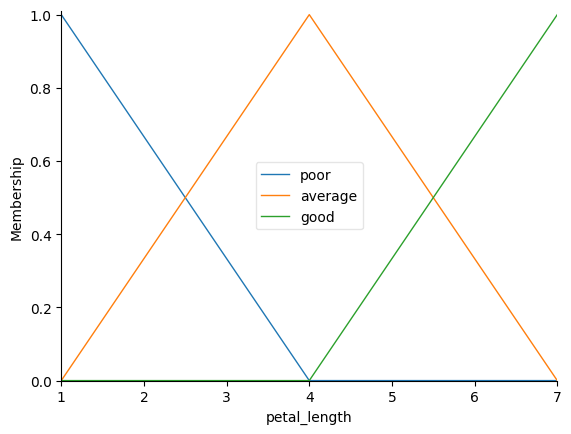

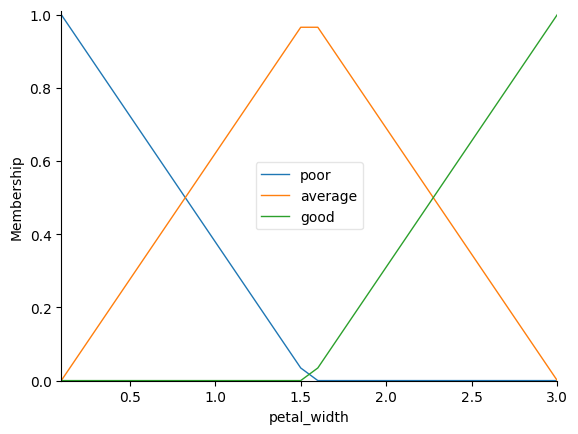

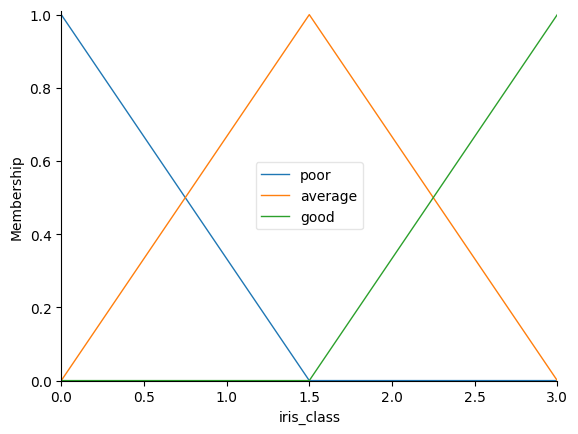

In [15]:
# Display the membership functions
sepal_length.view()
sepal_width.view()
petal_length.view()
petal_width.view()
iris_class.view()

In [16]:
# Define fuzzy rules
rule1 = ctrl.Rule(sepal_length['poor'] | sepal_width['poor'], iris_class['poor'])
rule2 = ctrl.Rule(petal_length['average'], iris_class['average'])
rule3 = ctrl.Rule(petal_width['good'] | petal_length['good'], iris_class['good'])

# Create control system
iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Define control system simulation
iris_ctrl_sim = ctrl.ControlSystemSimulation(iris_ctrl)

In [17]:
# Test with dataset
results = {
    'prediction': [],
    'actual': []
}
for i in range(len(X)):
  input_values = {'sepal_length': X['sepal length (cm)'][i],
                  'sepal_width': X['sepal width (cm)'][i],
                  'petal_length': X['petal length (cm)'][i],
                  'petal_width': X['petal width (cm)'][i]}
  output_value = y[i]

  # Compute output
  for key, value in input_values.items():
      iris_ctrl_sim.input[key] = value

  iris_ctrl_sim.compute()
  results['actual'] += [y[i]]
  results['prediction'] += [iris_ctrl_sim.output['iris_class']]

# # Print output
# print("\nOutput:")
# print("Predicted Iris class:", iris_ctrl_sim.output['iris_class'])

# # Show the output membership function
# iris_class.view(sim=iris_ctrl_sim)

In [18]:
mse = mean_squared_error(results['actual'], results['prediction'])
print(mse)

0.4937838257669826


In [54]:
# Exercise:
# Use a different dataset, for example from sklearn.datasets import load_wine
# Repeat the above exercise

In [179]:
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [87]:
data = load_wine()

features = pd.DataFrame(data = data['data'],columns = data.feature_names)
target = pd.DataFrame(data = data['target'], columns = ['target'])

In [88]:
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [58]:
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [89]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [90]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [92]:
df = features.join(target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


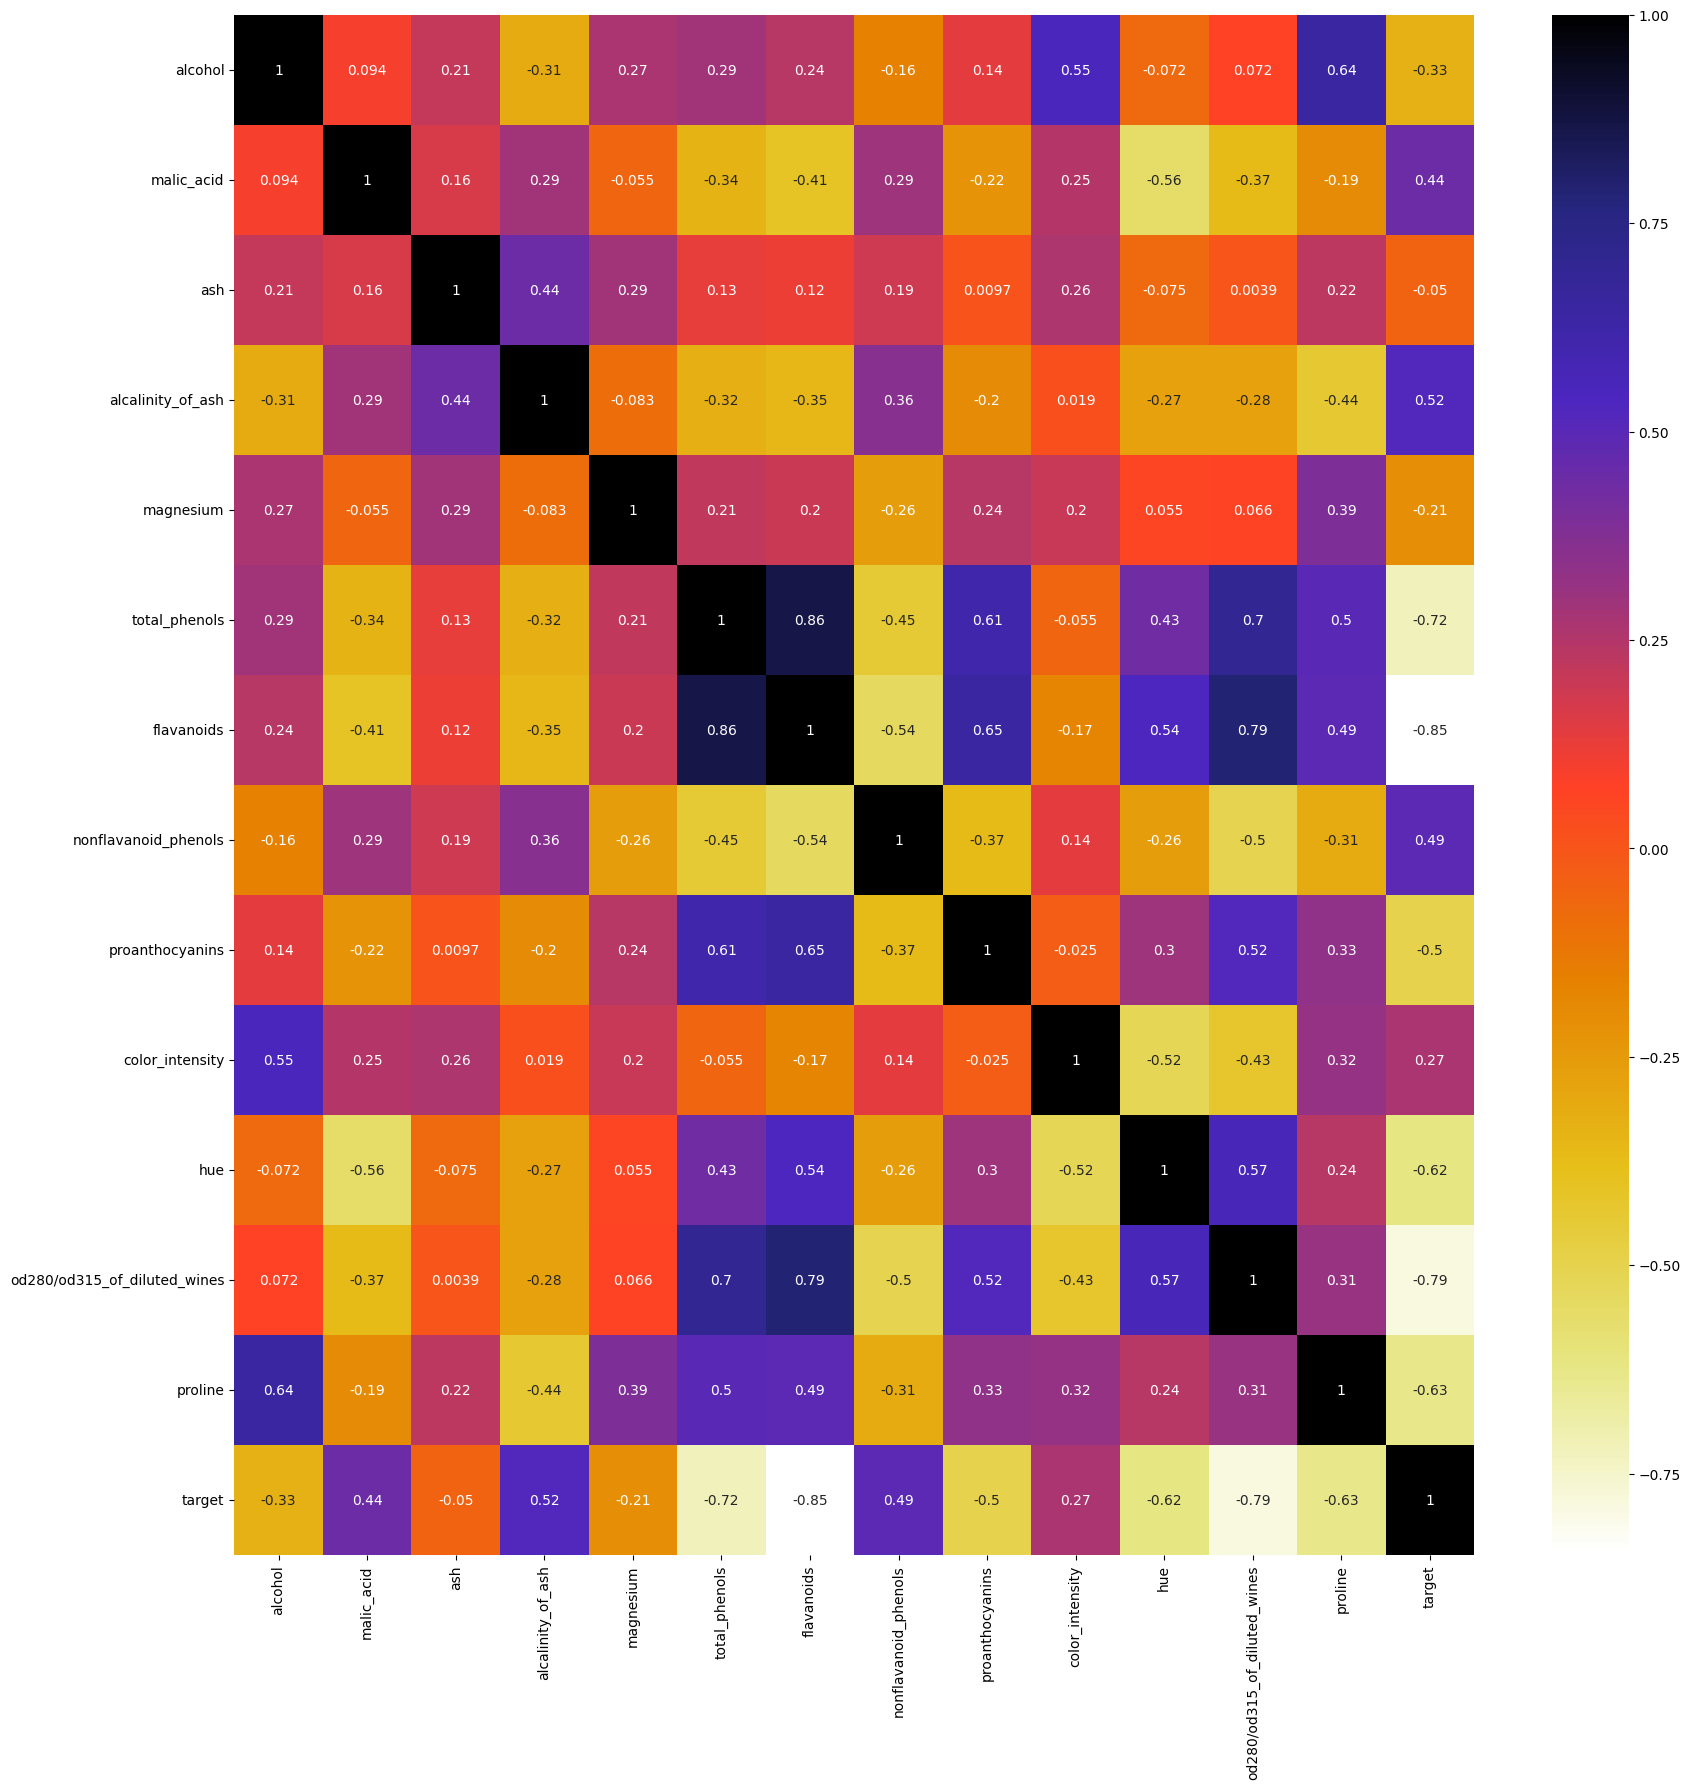

In [93]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,cmap = plt.cm.CMRmap_r)
plt.show();

In [94]:
def filter_low_correlation_features_with_target(df,threshold,target):
  col_low_corr = []
  corr_matrix = df.corrwith(df[target])
  for i in df.columns:
    if abs(corr_matrix[i]) < threshold:
      col_low_corr.append(i)

  df.drop(columns = col_low_corr,axis = 1,inplace = True)
  print("Features has dropped : ",col_low_corr)

filter_low_correlation_features_with_target(df,0.30,'target')

Features has dropped :  ['ash', 'magnesium', 'color_intensity']


In [105]:
#Feature Selection - Correlation
def get_high_correlation_features(df,target,threshold):
  col_corr = set()
  corr_matrix = df.corr()
  for i in range(len(df.columns)):
    for j in range (i):
      if (corr_matrix.iloc[i,j]) > threshold:
        col_name1 = corr_matrix.columns[j]
        col_name2 = corr_matrix.columns[i]
        corr_name1_target = abs(corr_matrix.loc[col_name1,target])
        corr_name2_target = abs(corr_matrix.loc[col_name2,target])
        # print(corr_name1_target)
        # print(corr_name2_target)
        if corr_name1_target > corr_name2_target:
           col_corr.add(col_name2)
        else:
           col_corr.add(col_name1)

  df.drop(columns = col_corr,axis = 1,inplace = True)
  print("Feature has dropped : ",col_corr)
  return col_corr

get_high_correlation_features(df,'target',0.85)

Feature has dropped :  set()


set()

In [106]:
df.head()

,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,3.06,0.28,2.29,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,2.76,0.26,1.28,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,3.24,0.30,2.81,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,3.49,0.24,2.18,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,2.69,0.39,1.82,1.04,2.93,735.0,0


In [129]:
antecedent = {}
for feature in df.columns[:-1]:
  min = df[feature].min()
  max = df[feature].max()
  antecedent[feature] = ctrl.Antecedent(np.arange(min,max,0.1), feature)

# alcohol = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'alcohol')
# malic_acid = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'malic_acid')
# alcalinity = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'alcalinity')
# flavanoids = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'nonflavanoid')
# nonflavanoid = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'proanthocyanins')
# proanthocyanins = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'hue')
# hue = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'sepal_length')
# proline = ctrl.Antecedent(np.arange(4, 8.1, 0.1), 'proline')

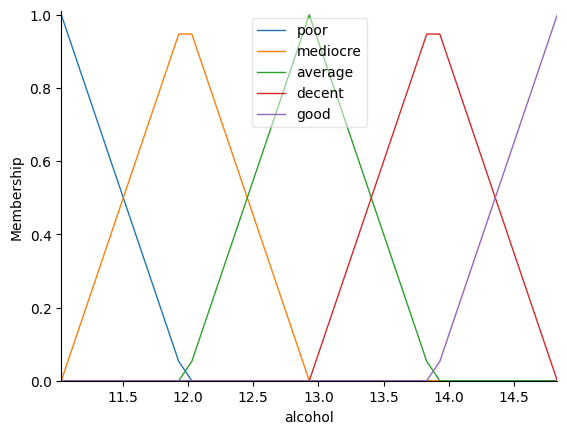

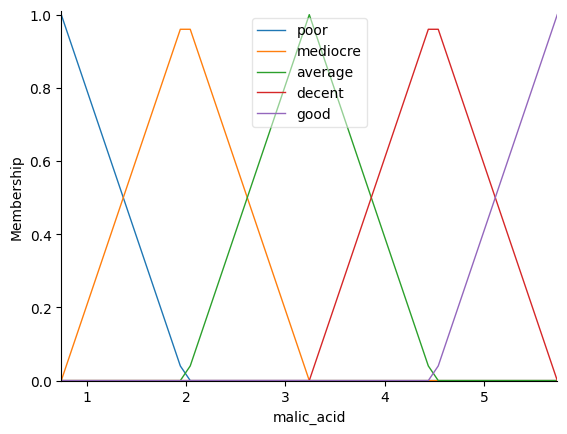

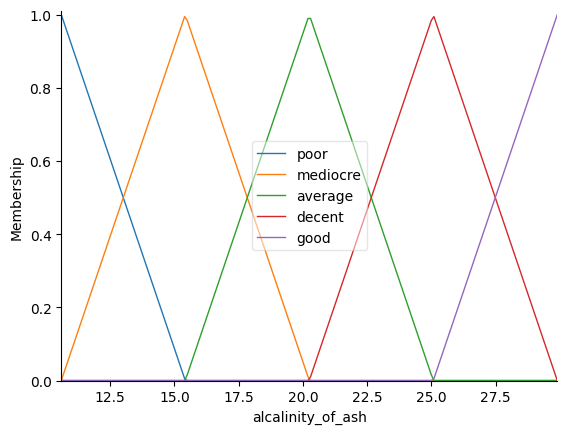

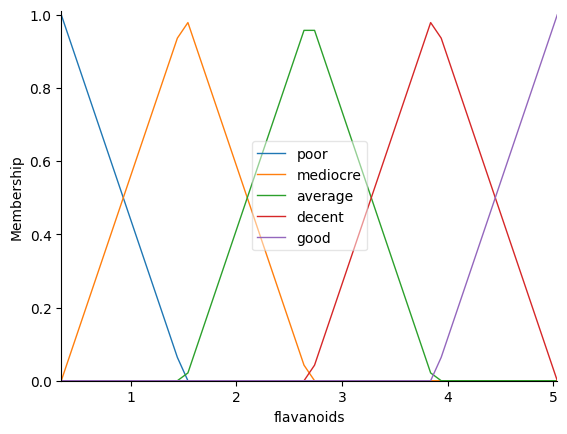

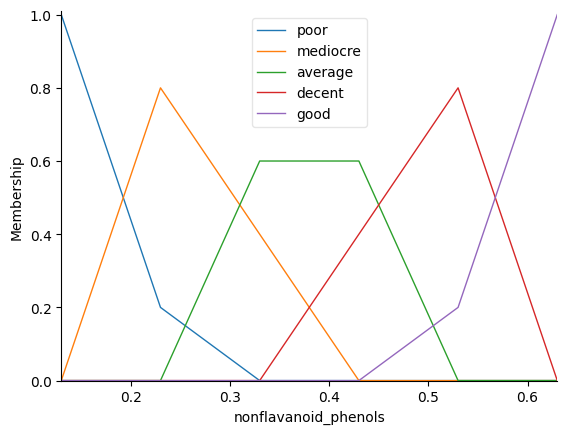

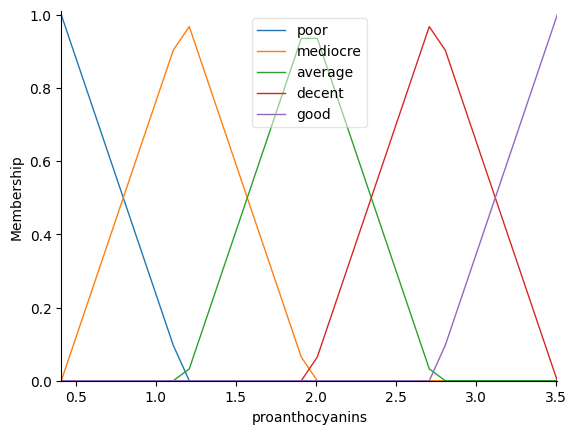

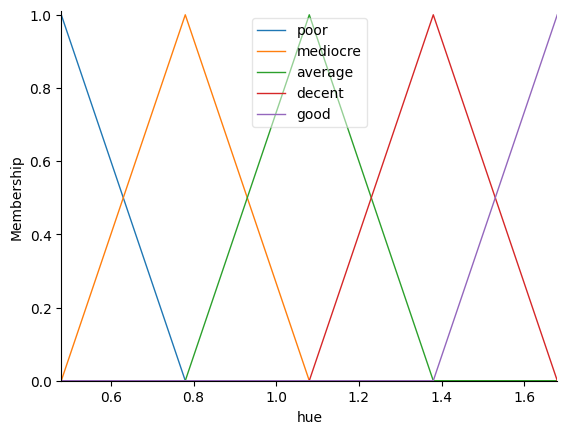

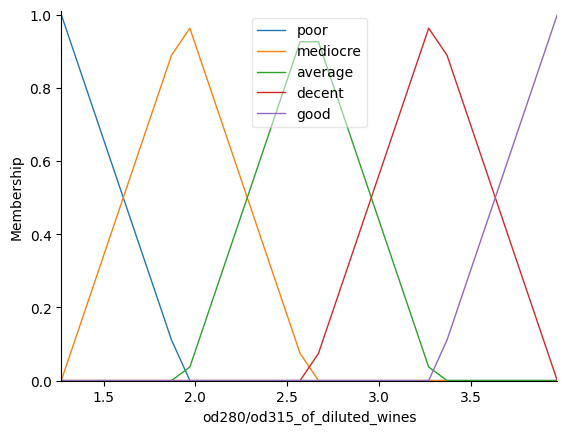

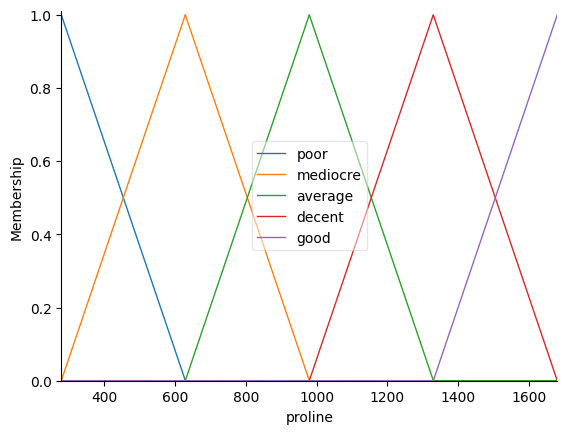

In [134]:
for item in antecedent.keys():
   antecedent[item].automf(5)
   antecedent[item].view()

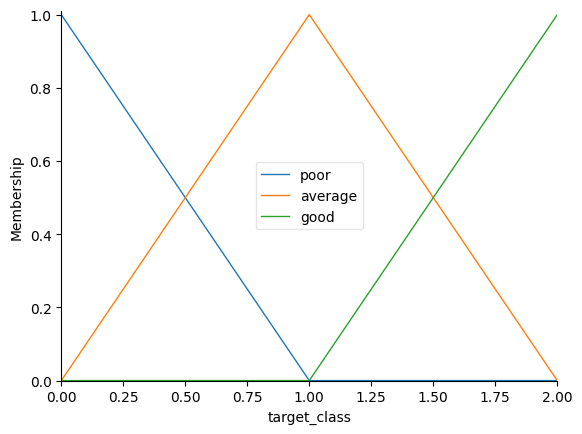

In [200]:
target_class = ctrl.Consequent(np.arange(0, 2.1, 0.1), 'target_class')

# Define membership functions for output variable
target_class.automf(3)

target_class.view()

In [212]:
# Define fuzzy rules
rule1 = ctrl.Rule(antecedent['alcohol']['mediocre'] & antecedent['malic_acid']['poor'],target_class['average'])
rule2 = ctrl.Rule(antecedent['alcohol']['mediocre'] & antecedent['hue']['mediocre'],target_class['average'])
rule3 = ctrl.Rule(antecedent['nonflavanoid_phenols']['mediocre'] & antecedent['hue']['mediocre'],target_class['average'])
rule4= ctrl.Rule(antecedent['flavanoids']['average'] & antecedent['hue']['average'],target_class['poor'])
rule5 = ctrl.Rule(antecedent['nonflavanoid_phenols']['poor'],target_class['poor'])
rule6 = ctrl.Rule(antecedent['alcalinity_of_ash']['mediocre'],target_class['poor'])
rule7 = ctrl.Rule(antecedent['proanthocyanins']['average'] | antecedent['od280/od315_of_diluted_wines']['average'] |  antecedent['proline']['average'],target_class['poor'])
rule8 = ctrl.Rule(antecedent['proanthocyanins']['good'] | antecedent['od280/od315_of_diluted_wines']['good'] |  antecedent['proline']['good'] | antecedent['alcalinity_of_ash']['good'],target_class['good'])
rule9 = ctrl.Rule(antecedent['nonflavanoid_phenols']['good'],target_class['good'])
# Create control system
target_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8])

# Define control system simulation
target_ctrl_sim = ctrl.ControlSystemSimulation(target_ctrl)

In [213]:
results = {
    'prediction': [],
    'actual': []
}
for i in range(len(df)):
  input_values = {}
  for feature in antecedent.keys():
    input_values[feature] = df[feature][i]

  output_value = df['target'][i]

  # Compute output
  for key, value in input_values.items():
      target_ctrl_sim.input[key] = value

  target_ctrl_sim.compute()
  results['actual'] += [df['target'][i]]
  results['prediction'] += [target_ctrl_sim.output['target_class']]


In [214]:
mse = mean_squared_error(results['actual'], results['prediction'])
print(mse)

0.6874529938636182
